#                                               Major_Project

# Covid _19_India

#Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import re
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


#loading Dataset

In [2]:
covid = pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)


INFORMATION ABOUT DATASET

In [3]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid = covid[['Date','Time','State/UnionTerritory','Cured','Deaths','Confirmed']]
covid.columns=['date','time','state','cured','deaths','confirmed']

In [5]:
covid.rename(columns={'State/UnionTerritory':'state'})

,date,time,state,cured,deaths,confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...
1249,2020-04-23,5:00 PM,Telengana,197,24,960
1250,2020-04-23,5:00 PM,Tripura,1,0,2
1251,2020-04-23,5:00 PM,Uttarakhand,23,0,46
1252,2020-04-23,5:00 PM,Uttar Pradesh,187,21,1509


In [6]:
covid.head(5)

,date,time,state,cured,deaths,confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


In [7]:
covid.tail()

,date,time,state,cured,deaths,confirmed
1249,2020-04-23,5:00 PM,Telengana,197,24,960
1250,2020-04-23,5:00 PM,Tripura,1,0,2
1251,2020-04-23,5:00 PM,Uttarakhand,23,0,46
1252,2020-04-23,5:00 PM,Uttar Pradesh,187,21,1509
1253,2020-04-23,5:00 PM,West Bengal,79,15,456


In [8]:
covid.describe()

,cured,deaths,confirmed
count,1254.000000,1254.000000,1254.000000
mean,24.524721,5.771930,186.789474
std,72.485487,22.301403,485.907171
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,1.000000,0.000000,18.000000
75%,14.000000,3.000000,109.750000
max,789.000000,269.000000,5652.000000


In [9]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1254 non-null   datetime64[ns]
 1   time       1254 non-null   object        
 2   state      1254 non-null   object        
 3   cured      1254 non-null   int64         
 4   deaths     1254 non-null   int64         
 5   confirmed  1254 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 58.9+ KB


In [11]:
covid.isnull().sum()

date         0
time         0
state        0
cured        0
deaths       0
confirmed    0
dtype: int64

In [12]:
covid["date"]= pd.to_datetime(covid.date)

In [13]:
covid["confirmed"]= covid.groupby("state").confirmed.tail()

In [14]:
#Top States with most ConfirmedIndianNational
covid.groupby("state")["confirmed"].mean().sort_values(ascending= False).head(28)

state
Maharashtra                    4679.200000
Delhi                          2076.200000
Gujarat                        2040.000000
Rajasthan                      1619.200000
Madhya Pradesh                 1543.800000
Tamil Nadu                     1518.800000
Uttar Pradesh                  1295.000000
Telengana                       908.200000
Andhra Pradesh                  758.000000
Kerala                          415.000000
Karnataka                       412.400000
West Bengal                     384.000000
Jammu and Kashmir               369.200000
Haryana                         247.200000
Punjab                          242.200000
Bihar                           114.000000
Odisha                           73.600000
Unassigned                       53.666667
Jharkhand#                       45.000000
Uttarakhand                      44.800000
Jharkhand                        41.000000
Himachal Pradesh                 39.200000
Chhattisgarh                     36.000000
Assam

VISUALIZATION

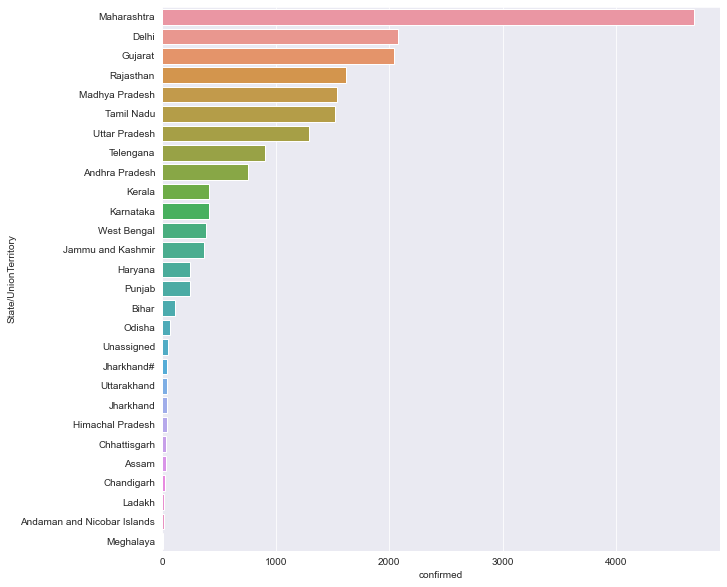

In [15]:
x= covid.groupby("state")["confirmed"].mean().sort_values(ascending= False).head(28)
sns.set_style("darkgrid")
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("confirmed")
ax.set_ylabel("State/UnionTerritory")
plt.show()

In [16]:
#Top States with most Deaths
covid.groupby("state")["deaths"].mean().sort_values(ascending= False).head(5)

state
Maharashtra       64.195652
Madhya Pradesh    26.000000
Gujarat           22.514286
Delhi             10.301887
Telengana          5.603774
Name: deaths, dtype: float64

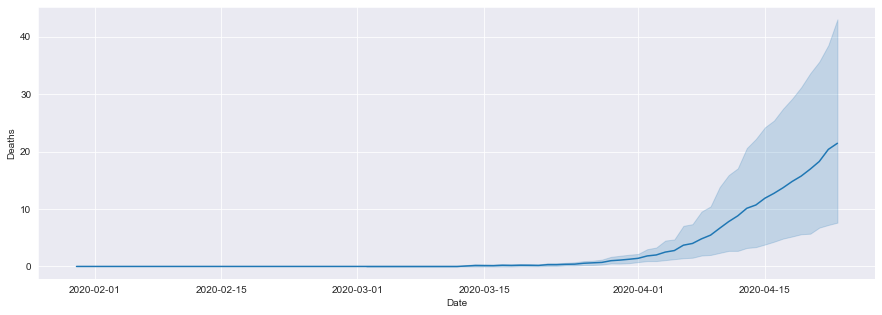

In [17]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "deaths",data= covid)
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.show()


<Figure size 1080x720 with 0 Axes>

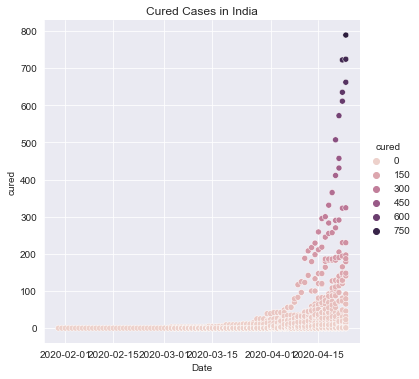

In [18]:
plt.figure(figsize= (15,10))
sns.relplot(x= "date",y= "cured" ,data= covid,hue='cured')
plt.xlabel("Date")
plt.title("Cured Cases in India")
plt.show()

In [19]:
today = covid[covid.date=='23-04-2020']

In [20]:
today.shape

(32, 6)

In [21]:
today.head()

,date,time,state,cured,deaths,confirmed
1222,2020-04-23,5:00 PM,Andaman and Nicobar Islands,11,0,18.0
1223,2020-04-23,5:00 PM,Andhra Pradesh,141,27,895.0
1224,2020-04-23,5:00 PM,Arunachal Pradesh,1,0,1.0
1225,2020-04-23,5:00 PM,Assam,19,1,35.0
1226,2020-04-23,5:00 PM,Bihar,46,2,148.0


In [22]:
today.tail()

,date,time,state,cured,deaths,confirmed
1249,2020-04-23,5:00 PM,Telengana,197,24,960.0
1250,2020-04-23,5:00 PM,Tripura,1,0,2.0
1251,2020-04-23,5:00 PM,Uttarakhand,23,0,46.0
1252,2020-04-23,5:00 PM,Uttar Pradesh,187,21,1509.0
1253,2020-04-23,5:00 PM,West Bengal,79,15,456.0


In [23]:
max_confirmed_cases=today.sort_values(by='confirmed',ascending=False)

In [24]:
max_confirmed_cases.head()

,date,time,state,cured,deaths,confirmed
1240,2020-04-23,5:00 PM,Maharashtra,789,269,5652.0
1231,2020-04-23,5:00 PM,Gujarat,179,103,2407.0
1229,2020-04-23,5:00 PM,Delhi,724,48,2248.0
1247,2020-04-23,5:00 PM,Rajasthan,230,27,1890.0
1239,2020-04-23,5:00 PM,Madhya Pradesh,148,81,1695.0


In [25]:
top_states_confirmed = max_confirmed_cases[0:10]

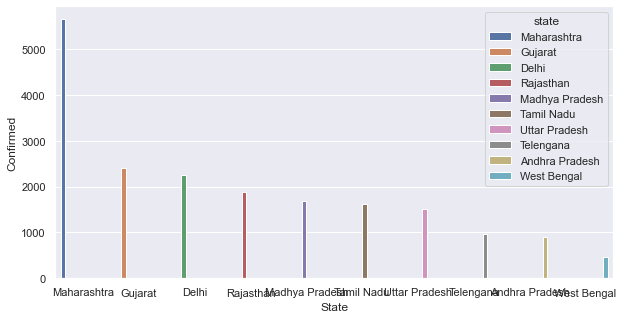

In [26]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x= "state",y= "confirmed",data = top_states_confirmed ,hue='state')
plt.xlabel("State")
plt.ylabel("Confirmed")
plt.show()

In [27]:
max_deaths_cases=today.sort_values(by='deaths',ascending=False)

In [28]:
max_deaths_cases.head()

,date,time,state,cured,deaths,confirmed
1240,2020-04-23,5:00 PM,Maharashtra,789,269,5652.0
1231,2020-04-23,5:00 PM,Gujarat,179,103,2407.0
1239,2020-04-23,5:00 PM,Madhya Pradesh,148,81,1695.0
1229,2020-04-23,5:00 PM,Delhi,724,48,2248.0
1247,2020-04-23,5:00 PM,Rajasthan,230,27,1890.0


In [29]:
top_states_deaths = max_deaths_cases[0:10]

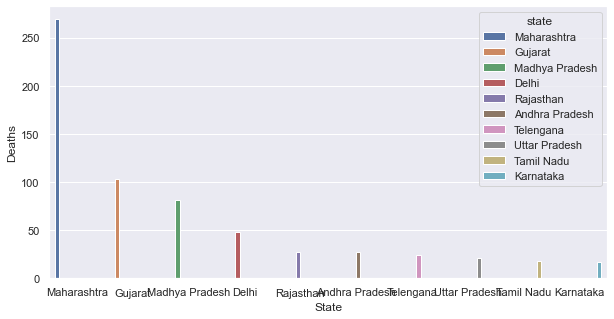

In [30]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x= "state",y= "deaths",data = top_states_deaths ,hue='state')
plt.xlabel("State")
plt.ylabel("Deaths")
plt.show()

In [31]:
max_cured_cases=today.sort_values(by='cured',ascending=False)

In [32]:
max_cured_cases.head()

,date,time,state,cured,deaths,confirmed
1240,2020-04-23,5:00 PM,Maharashtra,789,269,5652.0
1229,2020-04-23,5:00 PM,Delhi,724,48,2248.0
1248,2020-04-23,5:00 PM,Tamil Nadu,662,18,1629.0
1237,2020-04-23,5:00 PM,Kerala,324,3,438.0
1247,2020-04-23,5:00 PM,Rajasthan,230,27,1890.0


In [33]:
top_states_cured = max_deaths_cases[0:10]

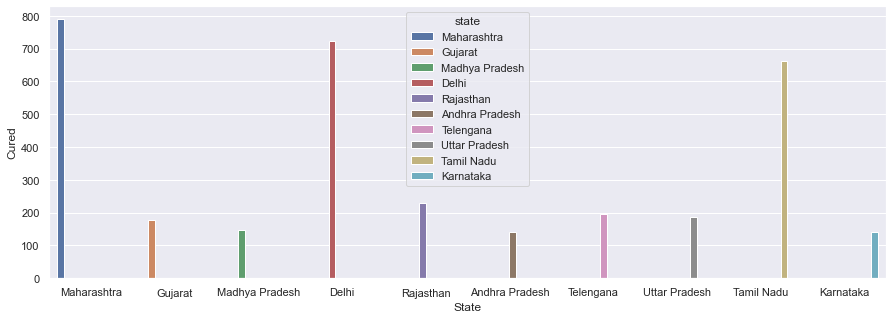

In [34]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x= "state",y= "cured",data = top_states_deaths ,hue='state')
plt.xlabel("State")
plt.ylabel("Cured")
plt.show()

#Maharashtra

In [35]:
maha = covid[covid.state=="Maharashtra"]

In [36]:
maha.shape

(46, 6)

In [37]:
maha.head()

,date,time,state,cured,deaths,confirmed
76,2020-03-09,6:00 PM,Maharashtra,0,0,NaN
91,2020-03-10,6:00 PM,Maharashtra,0,0,NaN
97,2020-03-11,6:00 PM,Maharashtra,0,0,NaN
120,2020-03-12,6:00 PM,Maharashtra,0,0,NaN
133,2020-03-13,6:00 PM,Maharashtra,0,0,NaN


In [38]:
maha.tail()

,date,time,state,cured,deaths,confirmed
1109,2020-04-19,5:00 PM,Maharashtra,365,211,3651.0
1142,2020-04-20,5:00 PM,Maharashtra,507,223,4203.0
1175,2020-04-21,5:00 PM,Maharashtra,572,232,4669.0
1208,2020-04-22,5:00 PM,Maharashtra,722,251,5221.0
1240,2020-04-23,5:00 PM,Maharashtra,789,269,5652.0


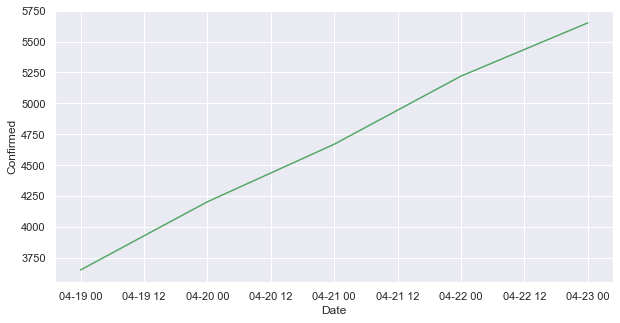

In [39]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x= "date",y= "confirmed",data= maha,color="g")
plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.show()

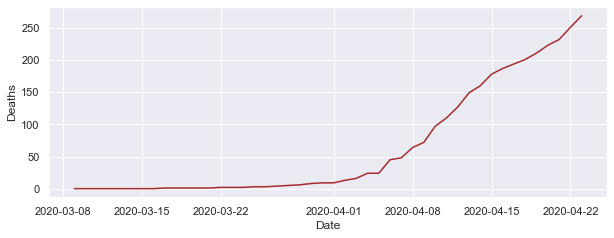

In [40]:
sns.set(rc={'figure.figsize':(10,3.5)})
sns.lineplot(x= "date",y= "deaths",data= maha,color="brown")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.show()

#Utter-Pradesh

In [41]:
up = covid[covid.state=="Uttar Pradesh"]

In [42]:
up.shape

(51, 6)

In [43]:
up.head()

,date,time,state,cured,deaths,confirmed
39,2020-03-04,6:00 PM,Uttar Pradesh,0,0,NaN
50,2020-03-05,6:00 PM,Uttar Pradesh,0,0,NaN
55,2020-03-06,6:00 PM,Uttar Pradesh,0,0,NaN
58,2020-03-07,6:00 PM,Uttar Pradesh,0,0,NaN
72,2020-03-08,6:00 PM,Uttar Pradesh,0,0,NaN


In [44]:
up.tail()

,date,time,state,cured,deaths,confirmed
1122,2020-04-19,5:00 PM,Uttar Pradesh,108,17,1084.0
1155,2020-04-20,5:00 PM,Uttar Pradesh,129,17,1176.0
1188,2020-04-21,5:00 PM,Uttar Pradesh,140,20,1294.0
1220,2020-04-22,5:00 PM,Uttar Pradesh,165,21,1412.0
1252,2020-04-23,5:00 PM,Uttar Pradesh,187,21,1509.0


In [45]:
today = up[up.date=='19-04-2020']

In [46]:
today.shape

(1, 6)

In [47]:
today.head()

,date,time,state,cured,deaths,confirmed
1122,2020-04-19,5:00 PM,Uttar Pradesh,108,17,1084.0


In [48]:
today.tail()

,date,time,state,cured,deaths,confirmed
1122,2020-04-19,5:00 PM,Uttar Pradesh,108,17,1084.0


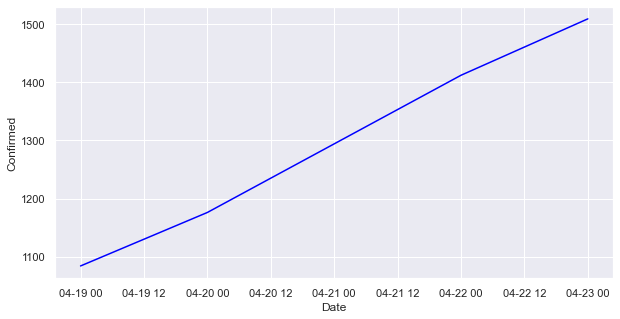

In [49]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x= "date",y= "confirmed",data= up,color="blue")
plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.show()

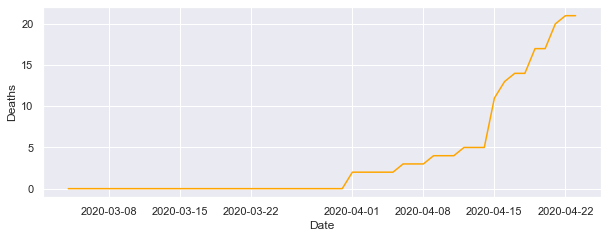

In [50]:
sns.set(rc={'figure.figsize':(10,3.5)})
sns.lineplot(x= "date",y= "deaths",data= up,color="orange")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.show()

#TamilNadu

In [51]:
Tamil = covid[covid.state=="Tamil Nadu"]

In [52]:
Tamil.shape

(48, 6)

In [53]:
Tamil.head()

,date,time,state,cured,deaths,confirmed
61,2020-03-07,6:00 PM,Tamil Nadu,0,0,NaN
67,2020-03-08,6:00 PM,Tamil Nadu,0,0,NaN
79,2020-03-09,6:00 PM,Tamil Nadu,0,0,NaN
94,2020-03-10,6:00 PM,Tamil Nadu,0,0,NaN
105,2020-03-11,6:00 PM,Tamil Nadu,0,0,NaN


In [54]:
Tamil.tail()

,date,time,state,cured,deaths,confirmed
1118,2020-04-19,5:00 PM,Tamil Nadu,365,15,1372.0
1151,2020-04-20,5:00 PM,Tamil Nadu,411,15,1477.0
1184,2020-04-21,5:00 PM,Tamil Nadu,457,17,1520.0
1216,2020-04-22,5:00 PM,Tamil Nadu,635,18,1596.0
1248,2020-04-23,5:00 PM,Tamil Nadu,662,18,1629.0


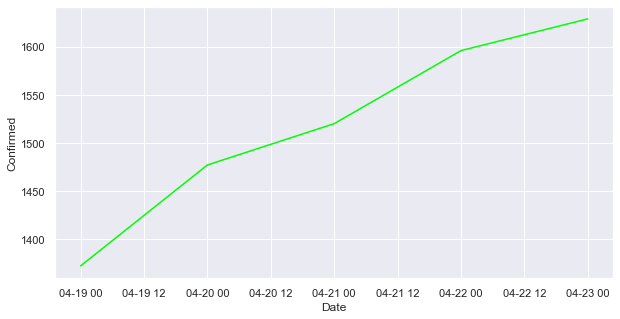

In [55]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x= "date",y= "confirmed",data= Tamil,color="lime")
plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.show()

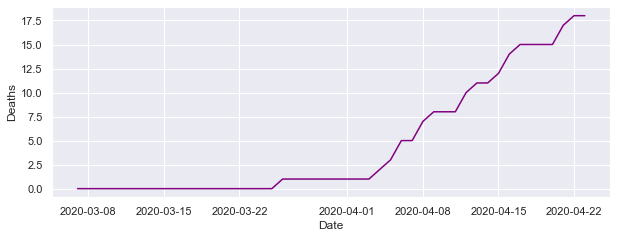

In [56]:
sns.set(rc={'figure.figsize':(10,3.5)})
sns.lineplot(x= "date",y= "deaths",data= Tamil,color="purple")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.show()

In [92]:
#test

In [57]:
test = pd.read_csv('StatewiseTestingDetails.csv')

In [58]:
test.head()


,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [59]:
test.tail()

,Date,State,TotalSamples,Negative,Positive
14653,2021-06-19,West Bengal,13631865.0,NaN,NaN
14654,2021-06-20,West Bengal,13684862.0,NaN,NaN
14655,2021-06-21,West Bengal,13732633.0,NaN,NaN
14656,2021-06-22,West Bengal,13783866.0,NaN,NaN
14657,2021-06-23,West Bengal,13839455.0,NaN,NaN


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
maha['date'] = maha['date'].map(dt.datetime.toordinal)

In [62]:
maha.tail()

,date,time,state,cured,deaths,confirmed
1109,737534,5:00 PM,Maharashtra,365,211,3651.0
1142,737535,5:00 PM,Maharashtra,507,223,4203.0
1175,737536,5:00 PM,Maharashtra,572,232,4669.0
1208,737537,5:00 PM,Maharashtra,722,251,5221.0
1240,737538,5:00 PM,Maharashtra,789,269,5652.0


In [63]:
x = maha['date']
y = maha['deaths']

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [68]:
lr.predict([[737539]])

array([[207.91022723]])